In [2]:
import os
import regex
from chemformula import ChemFormula as cf
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [4]:
duplicates #watch out for these duplicates

['HO2(14) + OH(2) <=> H2O(5) + O2(4)',
 'CO(16) + OH(2) <=> CO2(17) + H(9)',
 'H2(11) + O(10) <=> H(9) + OH(2)',
 '2 HO2(14) <=> H2O2(15) + O2(4)',
 'H2O2(15) + OH(2) <=> H2O(5) + HO2(14)',
 '2-BTP(1) + HO2(14) <=> S(276)',
 'C2H3F2(66) + O2(4) <=> CH2CF2(58) + HO2(14)',
 'O2(4) + S(3991) <=> S(8019)',
 'C2H4(31) + OH(2) <=> CH3CHO(37) + H(9)',
 'O2(4) + S(3991) <=> S(7931)',
 'CBr(425) + CH2(T)(19) <=> CH2Br(969) + CH3(20)',
 'C2H6(32) + CH3(20) <=> C2H5(33) + CH4(3)',
 'CH2OH(34) + CH3O(28) <=> CH2O(21) + CH3OH(27)',
 'O2(4) + S(140) <=> 2-BTP(1) + HO2(14)',
 'O2(4) + S(164) <=> O(10) + S(161)',
 'O2(4) + S(427) <=> HO2(14) + S(1783)',
 'O2(4) + S(17512) <=> S(19047)',
 'O2(4) + S(17512) <=> S(18986)',
 'OH(2) + S(161) <=> HO2(14) + S(164)',
 'CF2(44) + HO2(14) <=> CF2O(50) + OH(2)',
 'O2(4) + S(17512) <=> S(18985)',
 'C3H3(6704) + HO2(14) <=> C#CC(8822) + O2(4)',
 'BR(91) + S(11233) <=> HBR(93) + S(17512)',
 'S(127) + S(130) <=> 2-BTP(1) + CF3CCH(85)',
 'O2(4) + S(164) <=> 2-BTP(1) 

In [3]:
duplicates = []
#let's track how sensitivities change across 2-BTP volume fractions 

RMG_csvs = [file for file in os.listdir('.') if '_final_2_BTPsensitivities.csv' in file]
equations_ = []

for file in [RMG_csvs[0]]: 

    df = pd.read_csv(f'./{file}')
    vf = regex.search('cti_(\S+)_final_2_BTPsensitivities', file).group(1)
    #now we will collect data to plot 
    
    for index, row in df.iterrows(): 
        sens, eq = row['sensitivity'], row['cantera equation']
        if eq not in equations_: 
            equations_.append(eq)
        else:
            duplicates.append(eq)
        
        

In [8]:
#let's track how sensitivities change across 2-BTP volume fractions 

RMG_csvs = [file for file in os.listdir('.') if '_final_2_BTPsensitivities.csv' in file]

collected_data_across_vf = {}


for file in RMG_csvs: 

    df = pd.read_csv(f'./{file}')
    vf = regex.search('cti_(\S+)_final_2_BTPsensitivities', file).group(1)
    #now we will collect data to plot 
    
    for index, row in df.iterrows(): 
            sens, eq = row['sensitivity'], row['cantera equation']
            if eq in duplicates: 
                continue
            if eq not in collected_data_across_vf.keys(): 
                collected_data_across_vf[eq]=[-sens] #change to opposite sign since this file has things subtracted wrong
            else: 
                sens_list = collected_data_across_vf[eq]
                sens_list.append(-sens) #change to opposite sign since this file has things subtracted wrong
                collected_data_across_vf[eq]=sens_list

    
        

In [9]:
eq_and_their_totals = {}


for eq, sens_list in collected_data_across_vf.items():
    abs_value_total = sum([abs(x) for x in sens_list])
    eq_and_their_totals[eq]=abs_value_total
    
sorted_totals = sorted(eq_and_their_totals.items(), key=lambda x:x[1], reverse=True)

In [10]:
sorted_totals

[('BR(91) + HCO(18) <=> CO(16) + HBR(93)', 0.8224624834608537),
 ('H(9) + O2(4) <=> O(10) + OH(2)', 0.7984468054292838),
 ('C2H2(24) + CH3(20) <=> C#CC(8822) + H(9)', 0.633027128584938),
 ('C3H3(6704) + H(9) <=> C#CC(8822)', 0.586332117748336),
 ('H(9) + O2(4) <=> HO2(14)', 0.5474297098487709),
 ('HCO(18) + M <=> CO(16) + H(9) + M', 0.4423242733973938),
 ('CBr(425) <=> BR(91) + CH3(20)', 0.4000314126803431),
 ('C3H3(6704) + HBR(93) <=> BR(91) + C#CC(8822)', 0.39719339252984476),
 ('2 CH3(20) <=> C2H5(33) + H(9)', 0.36613874422077),
 ('CH2(T)(19) + O2(4) <=> CHO2(230) + H(9)', 0.3209599504897562),
 ('HCO(18) + OH(2) <=> CO(16) + H2O(5)', 0.31081392548983183),
 ('H(9) + HCO(18) <=> CO(16) + H2(11)', 0.28456315009035377),
 ('BROH(8) (+M) <=> BR(91) + OH(2) (+M)', 0.28442022103692405),
 ('CH2OH(34) + H(9) <=> CH3(20) + OH(2)', 0.28166046206049883),
 ('CH3(20) + O(10) <=> CH2O(21) + H(9)', 0.2772332449781919),
 ('CH3(20) + H(9) <=> CH4(3)', 0.24897771920489342),
 ('CH3(20) + OH(2) <=> CH2(S

In [13]:
low_sens = []
middle_sens = []
second_hi_sens = []
high_sens = []
equations = []

for (eq, abs_val_total) in sorted_totals[0:33]:
    if ('BR'in eq) or ('F' in eq):
        print(eq, abs_val_total)
        sens_list = collected_data_across_vf[eq]
        lo, mid, second_hi, hi = sens_list[0], sens_list[3], sens_list[6], sens_list[-1]
        low_sens.append(lo)
        middle_sens.append(mid)
        second_hi_sens.append(second_hi)
        high_sens.append(hi)
        equations.append(eq)

        

BR(91) + HCO(18) <=> CO(16) + HBR(93) 0.8224624834608537
CBr(425) <=> BR(91) + CH3(20) 0.4000314126803431
C3H3(6704) + HBR(93) <=> BR(91) + C#CC(8822) 0.39719339252984476
BROH(8) (+M) <=> BR(91) + OH(2) (+M) 0.28442022103692405
BR(91) + CH3(20) <=> CH2(T)(19) + HBR(93) 0.19649854341392584
CF3CCH(85) + CH3(20) <=> C#CC(8822) + CF3(46) 0.19573519719022842
CF2(44) + O2(4) <=> CF2O(50) + O(10) 0.19247235085757208
BR(91) + HO2(14) <=> HBR(93) + O2(4) 0.1867860789224848
CF3CCH(85) + H(9) <=> C2H2(24) + CF3(46) 0.1537985669129966
HBR(93) + O(10) <=> BR(91) + OH(2) 0.13500280996086478


In [17]:
def format_with_cf(rxn): 
    """ change the equation so it is formatted""" 
    changing_names = {}
    for spec in rxn.split(): 
        if regex.search('[A-Z][0-9]', spec):
            changing_names[spec]=cf(spec).unicode
    #now cycle through to change the equation 
    for old_name, new_name in changing_names.items():
        rxn=rxn.replace(old_name, new_name)
    return rxn

In [18]:
equations = ['Br + HCO ⇌ CO + HBr',
 'CH3Br ⇌ Br + CH3',
 'C3H3 + HBr ⇌ Br + C3H4', #triple bond on C3H4
 'BrOH (+M) ⇌ Br + OH (+M)',
 'Br + CH3 ⇌ CH2 + HBr', #CH2 with 2 unpaired radicals on the C
 'CF3CCH + CH3 ⇌ C3H4 + CF3',
 'CF2 + O2 ⇌ CF2O + O',
 'Br + HO2 ⇌ HBr + O2',
 'CF3CCH + H ⇌ C2H2 + CF3',
 'HBr + O ⇌ Br + OH']

formatted_rxns = [format_with_cf(rxn) for rxn in equations]

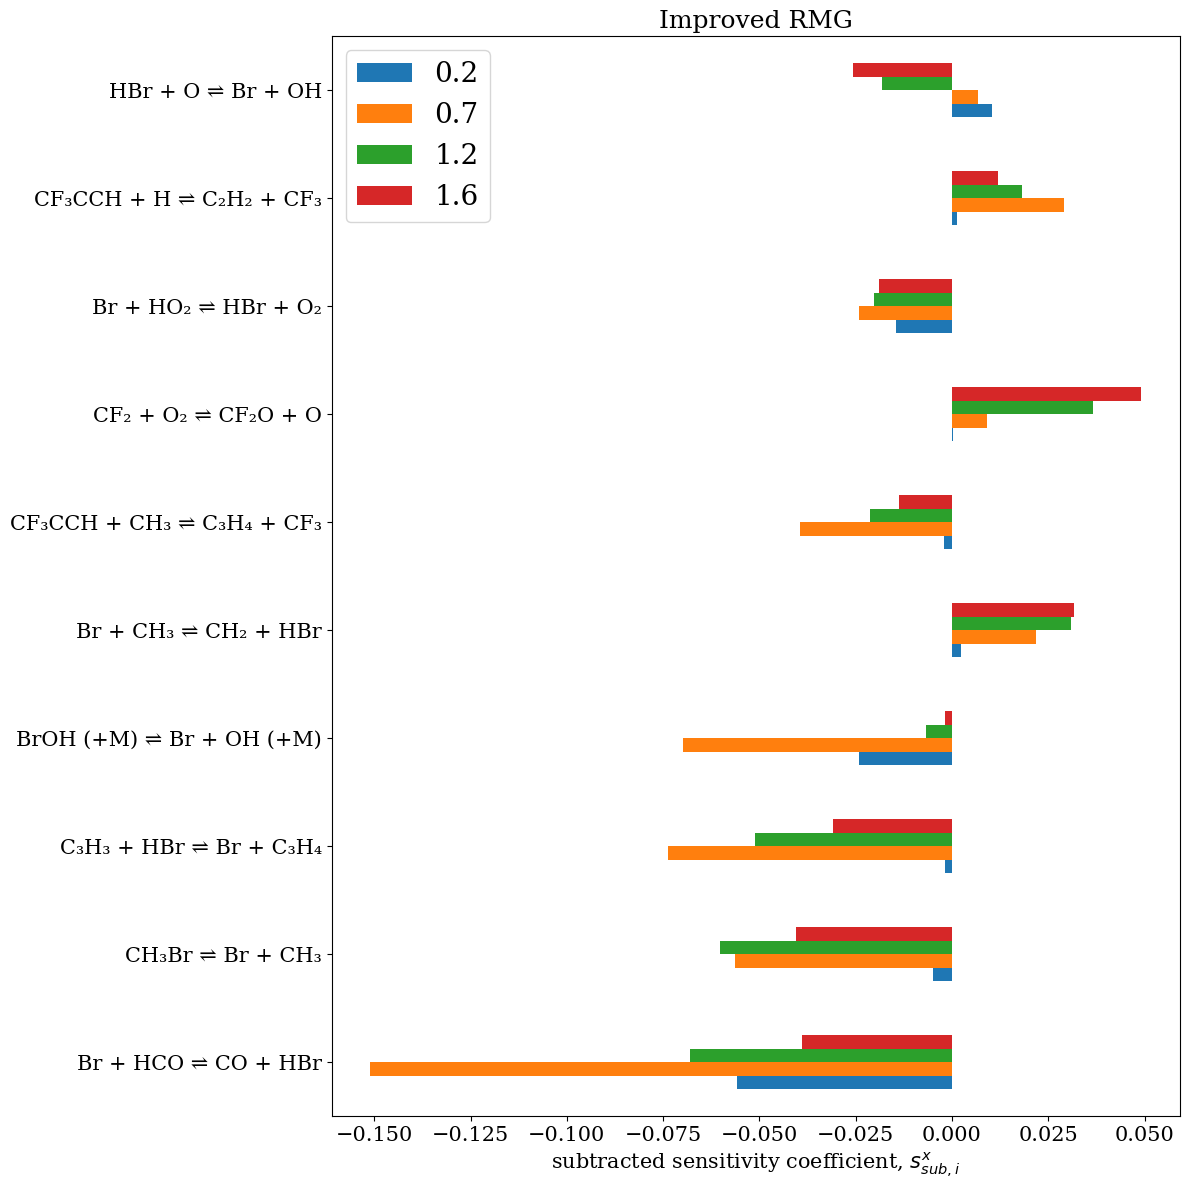

In [22]:
df_final = pd.DataFrame({'0.2': low_sens,
                         '0.7': middle_sens,
                         '1.2': second_hi_sens, 
                         '1.6': high_sens}, index=formatted_rxns)
ax = df_final.plot.barh(figsize=(12,12))
ax.set_xlabel(r'subtracted sensitivity coefficient, $s^{x}_{sub, i}$', fontsize=15)
ax.legend(fontsize=20)
plt.title('Improved RMG', fontsize=18)
plt.savefig('Updated_Figure_7.pdf', format='pdf')

In [19]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'serif'

In [29]:
#not picking out Br or F, just plain subtract sensitivity

low_sens = []
middle_sens = []
second_hi_sens = []
high_sens = []
equations = []

for (eq, total) in sorted_totals[0:50]:
        print(eq, total)
        sens_list = collected_data_across_vf[eq]
        lo, mid, second_hi, hi = sens_list[0], sens_list[3], sens_list[6], sens_list[-1]
        low_sens.append(lo)
        middle_sens.append(mid)
        second_hi_sens.append(second_hi)
        high_sens.append(hi)
        equations.append(eq)

        

BR(91) + HCO(18) <=> CO(16) + HBR(93) 0.8224624834608537
H(9) + O2(4) <=> O(10) + OH(2) 0.7984468054292838
C2H2(24) + CH3(20) <=> C#CC(8822) + H(9) 0.633027128584938
C3H3(6704) + H(9) <=> C#CC(8822) 0.586332117748336
H(9) + O2(4) <=> HO2(14) 0.5474297098487709
HCO(18) + M <=> CO(16) + H(9) + M 0.4423242733973938
CBr(425) <=> BR(91) + CH3(20) 0.4000314126803431
C3H3(6704) + HBR(93) <=> BR(91) + C#CC(8822) 0.39719339252984476
2 CH3(20) <=> C2H5(33) + H(9) 0.36613874422077
CH2(T)(19) + O2(4) <=> CHO2(230) + H(9) 0.3209599504897562
HCO(18) + OH(2) <=> CO(16) + H2O(5) 0.31081392548983183
H(9) + HCO(18) <=> CO(16) + H2(11) 0.28456315009035377
BROH(8) (+M) <=> BR(91) + OH(2) (+M) 0.28442022103692405
CH2OH(34) + H(9) <=> CH3(20) + OH(2) 0.28166046206049883
CH3(20) + O(10) <=> CH2O(21) + H(9) 0.2772332449781919
CH3(20) + H(9) <=> CH4(3) 0.24897771920489342
CH3(20) + OH(2) <=> CH2(S)(26) + H2O(5) 0.2419625010038832
C2H2(24) + O(10) <=> H(9) + HCCO(22) 0.22889758962264473
H2(11) + OH(2) <=> H(9) 